Aggloromerative Hierarchial Clustering

In [8]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import  linkage,dendrogram

import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.linear_model import ElasticNet, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector,make_column_transformer
from sklearn.metrics import classification_report, mean_absolute_error, r2_score, f1_score, accuracy_score,log_loss
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import VotingClassifier, VotingRegressor, BaggingClassifier, BaggingRegressor, \
    RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from tqdm import tqdm


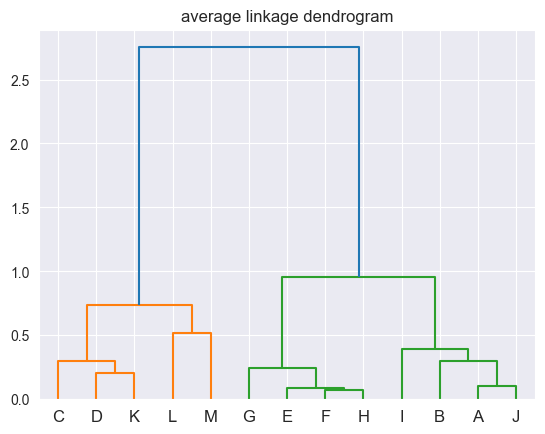

In [12]:
df=pd.read_csv('simp_clust.csv',index_col=0)
scaler=StandardScaler().set_output(transform='pandas')
df_scaled=scaler.fit_transform(df)
link='average'
mergings=linkage(df_scaled,method=link)
dendrogram(mergings,labels=list(df_scaled.index))
plt.title(link+' linkage dendrogram')
plt.show()

In [11]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [16]:
clust=AgglomerativeClustering(n_clusters=2)
clust.fit(df_scaled)
print(clust.labels_)

[0 0 1 1 0 0 0 0 0 0 1 1 1]


In [17]:
df_copy=df.copy()
df_copy["label"]=clust.labels_


In [18]:
print(df_copy)

      X1   X2  label
Name                
A     23  150      0
B     24  167      0
C     67  256      1
D     65  240      1
E     12  102      0
F     11   96      0
G     15  112      0
H     10  100      0
I     34  156      0
J     25  145      0
K     70  234      1
L     80  257      1
M     85  289      1


In [20]:
clusters=[2,3,4,5,6,7]
scores=[]
for c in clusters:
    clust=AgglomerativeClustering(n_clusters=c)
    clust.fit(df_scaled)
    scores.append([c,silhouette_score(df_scaled,clust.labels_)])
df_scores=pd.DataFrame(scores,columns=['cluster','silhouete score'])
df_scores.sort_values('silhouete score',ascending=False)
print(df_scores)

   cluster  silhouete score
0        2         0.768625
1        3         0.748692
2        4         0.642185
3        5         0.570780
4        6         0.453127
5        7         0.451401


In [21]:
clusters=[2,3,4,5,6,7]
linkages=['ward','complete','average','single']
scores=[]
for c in clusters:
    for l in linkages:
        clust=AgglomerativeClustering(n_clusters=c,linkage=l)
        clust.fit(df_scaled)
        scores.append([c,l,silhouette_score(df_scaled,clust.labels_)])
df_scores=pd.DataFrame(scores,columns=['cluster','Linkage','silhouete score'])
df_scores.sort_values('silhouete score',ascending=False)
print(df_scores)

    cluster   Linkage  silhouete score
0         2      ward         0.768625
1         2  complete         0.768625
2         2   average         0.768625
3         2    single         0.768625
4         3      ward         0.748692
5         3  complete         0.748692
6         3   average         0.748692
7         3    single         0.748692
8         4      ward         0.642185
9         4  complete         0.642185
10        4   average         0.642185
11        4    single         0.602717
12        5      ward         0.570780
13        5  complete         0.570780
14        5   average         0.570780
15        5    single         0.570780
16        6      ward         0.453127
17        6  complete         0.453127
18        6   average         0.453127
19        6    single         0.453127
20        7      ward         0.451401
21        7  complete         0.389872
22        7   average         0.389872
23        7    single         0.451401


[[20.         21.          0.14557691  2.        ]
 [10.         15.          0.30903062  2.        ]
 [ 1.          2.          0.34704952  2.        ]
 [ 6.         11.          0.35975407  2.        ]
 [ 5.         14.          0.36090936  2.        ]
 [ 7.         26.          0.36925133  3.        ]
 [ 3.         12.          0.42572471  2.        ]
 [27.         31.          0.5853266   4.        ]
 [28.         29.          0.59940787  4.        ]
 [16.         19.          0.61176231  2.        ]
 [ 0.         32.          0.62923999  5.        ]
 [ 8.         13.          0.78713165  2.        ]
 [22.         25.          0.83150788  3.        ]
 [30.         33.          0.97124069  7.        ]
 [23.         24.          1.10551437  2.        ]
 [ 9.         36.          1.20249687  3.        ]
 [ 4.         35.          1.23140025  6.        ]
 [34.         40.          1.3465513   5.        ]
 [38.         41.          1.62574698 13.        ]
 [18.         37.          1.91

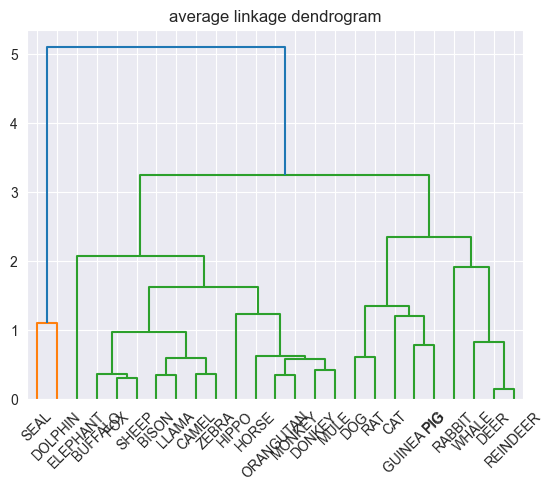

In [30]:
milk=pd.read_csv("milk.csv",index_col=0)
ss=StandardScaler().set_output(transform='pandas')
milk_scaled=ss.fit_transform(milk)
link='average'
mergings=linkage(milk_scaled,method=link)
print(mergings)
dendrogram(mergings,labels=list(milk.index))
plt.title(link+' linkage dendrogram')
plt.show()

In [31]:
clusters=[2,3,4,5,6,7]
linkages=['ward','complete','average','single']
scores=[]
for c in clusters:
    for l in linkages:
      clust=AgglomerativeClustering(n_clusters=c)
      clust.fit(df_scaled)
      scores.append([c,l,silhouette_score(df_scaled,clust.labels_)])
df_scores=pd.DataFrame(scores,columns=['cluster','Linkage','silhouete score'])
df_scores.sort_values('silhouete score',ascending=False)
print(df_scores)


    cluster   Linkage  silhouete score
0         2      ward         0.768625
1         2  complete         0.768625
2         2   average         0.768625
3         2    single         0.768625
4         3      ward         0.748692
5         3  complete         0.748692
6         3   average         0.748692
7         3    single         0.748692
8         4      ward         0.642185
9         4  complete         0.642185
10        4   average         0.642185
11        4    single         0.642185
12        5      ward         0.570780
13        5  complete         0.570780
14        5   average         0.570780
15        5    single         0.570780
16        6      ward         0.453127
17        6  complete         0.453127
18        6   average         0.453127
19        6    single         0.453127
20        7      ward         0.451401
21        7  complete         0.451401
22        7   average         0.451401
23        7    single         0.451401


[[ 0.         10.          0.06973555  2.        ]
 [11.         12.          0.18939102  2.        ]
 [ 6.         25.          0.21915945  2.        ]
 [27.         28.          0.41581508  4.        ]
 [ 1.          8.          0.4202579   2.        ]
 [ 3.         30.          0.57241854  5.        ]
 [ 4.         14.          0.75192779  2.        ]
 [20.         22.          0.78097139  2.        ]
 [ 5.         15.          0.79940943  2.        ]
 [18.         19.          0.80176192  2.        ]
 [21.         23.          0.94966792  2.        ]
 [ 9.         32.          0.95589543  6.        ]
 [13.         31.          1.02636494  3.        ]
 [16.         17.          1.08097041  2.        ]
 [29.         35.          1.6079578   4.        ]
 [26.         33.          1.84265596  3.        ]
 [34.         36.          1.92586168  4.        ]
 [ 2.         38.          2.11474542  7.        ]
 [41.         42.          2.47824624  7.        ]
 [37.         43.          3.02

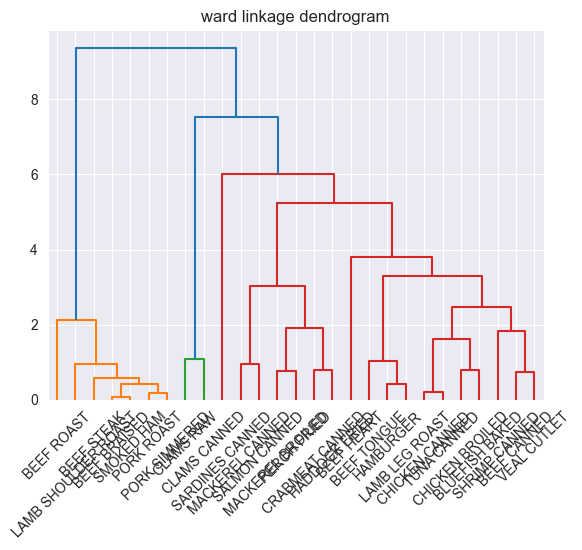

    cluster   Linkage  silhouete score
3         2    single         0.448342
7         3    single         0.445319
6         3   average         0.445319
8         4      ward         0.415801
9         4  complete         0.415801
2         2   average         0.413451
5         3  complete         0.403730
4         3      ward         0.403730
14        5   average         0.400003
13        5  complete         0.400003
21        7  complete         0.375569
12        5      ward         0.371724
18        6   average         0.366377
22        7   average         0.366310
17        6  complete         0.359013
16        6      ward         0.359013
20        7      ward         0.334073
10        4   average         0.331116
11        4    single         0.331116
0         2      ward         0.325786
1         2  complete         0.325786
15        5    single         0.240708
19        6    single         0.169526
23        7    single         0.036225


In [39]:
nutrient=pd.read_csv("nutrient.csv",index_col=0)
ss=StandardScaler().set_output(transform='pandas')
nutrient_scaled=ss.fit_transform(nutrient)
link='ward'
mergings=linkage(nutrient_scaled,method=link)
print(mergings)
dendrogram(mergings,labels=list(nutrient.index))
plt.title(link+' linkage dendrogram')
plt.show()
clusters=[2,3,4,5,6,7]
linkages=['ward','complete','average','single']
scores=[]
for c in clusters:
    for l in linkages:
        clust=AgglomerativeClustering(n_clusters=c,linkage=l)
        clust.fit(nutrient_scaled)
        scores.append([c,l,silhouette_score(nutrient_scaled,clust.labels_)])
df_scores=pd.DataFrame(scores,columns=['cluster','Linkage','silhouete score'])
df_scores.sort_values('silhouete score',ascending=False,inplace=True)
print(df_scores)

